## 모델 적용 및 평가
1. 로지스틱 회귀 모델
2. XGBoost 

* 하이퍼파라미터 고정
    - test_size=0.2
    - random_state=42 

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
import matplotlib.pyplot as plt


In [74]:
# 데이터 로드
df = pd.read_csv('./data/gym_churn_us.csv')
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [75]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [76]:
# 1. 데이터 로드 완료

# 2. 데이터 전처리

# 이진으로 분류된 데이터를 제외하고 범주형 데이터를 위한 전처리
columns = ['Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
scaler = StandardScaler()
df[columns] =scaler.fit_transform(df[columns])

# 3. 데이터 분리
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 모델 적용 및 평가

# 4_1. 로지스틱 모델
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 평가
print(f'훈련 점수: {lr.score(X_train, y_train)}, 테스트 점수: {lr.score(X_test, y_test)}') 

# 모델 성능 평가
y_pred_lr = lr.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} 모델 성능 평가")
    print("accuracy_score", accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print(f'f1_score: {f1_score(y_test, y_pred)}')

evaluate_model(y_test, y_pred_lr, 'LogisticRegression')

# 4-2. XGBoost 모델 
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# 모델 성능 평가
evaluate_model(y_test, y_pred_xgb, 'XGBoost')
print(classification_report(y_test, y_pred_xgb))

훈련 점수: 0.9334375, 테스트 점수: 0.91625

LogisticRegression 모델 성능 평가
accuracy_score 0.91625
precision: 0.8729281767955801
f1_score: 0.825065274151436

XGBoost 모델 성능 평가
accuracy_score 0.9275
precision: 0.8829787234042553
f1_score: 0.8512820512820513
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       598
           1       0.88      0.82      0.85       202

    accuracy                           0.93       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.93      0.93      0.93       800



c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:26:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [77]:
#  그냥 참고...
coef = lr.coef_
print(coef)

intercept = lr.intercept_
print(intercept)


[[ 0.2103552  -0.24302104 -0.05796166 -0.5104882  -0.04857766 -0.25813326
  -0.74327042 -0.35582876 -0.5421043  -0.14031257 -3.62931784  3.36114206
  -4.49878053]]
[8.53162936]


-------------

[0]	validation_0-logloss:0.53284	validation_1-logloss:0.53022
[1]	validation_0-logloss:0.49460	validation_1-logloss:0.49240
[2]	validation_0-logloss:0.46209	validation_1-logloss:0.46160


[3]	validation_0-logloss:0.43555	validation_1-logloss:0.43529
[4]	validation_0-logloss:0.40979	validation_1-logloss:0.41172
[5]	validation_0-logloss:0.38991	validation_1-logloss:0.39339
[6]	validation_0-logloss:0.37053	validation_1-logloss:0.37675
[7]	validation_0-logloss:0.35335	validation_1-logloss:0.36037
[8]	validation_0-logloss:0.33868	validation_1-logloss:0.34641
[9]	validation_0-logloss:0.32643	validation_1-logloss:0.33520
[10]	validation_0-logloss:0.31453	validation_1-logloss:0.32484
[11]	validation_0-logloss:0.30450	validation_1-logloss:0.31529
[12]	validation_0-logloss:0.29550	validation_1-logloss:0.30814
[13]	validation_0-logloss:0.28634	validation_1-logloss:0.30001
[14]	validation_0-logloss:0.27816	validation_1-logloss:0.29201
[15]	validation_0-logloss:0.27069	validation_1-logloss:0.28446
[16]	validation_0-logloss:0.26380	validation_1-logloss:0.27827
[17]	validation_0-logloss:0.25754	validation_1-logloss:0.27241
[18]	validation_0-logloss:0.25116	validation_1-logloss:0.26712

c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:29:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


[139]	validation_0-logloss:0.10134	validation_1-logloss:0.14577
[140]	validation_0-logloss:0.10106	validation_1-logloss:0.14560
[141]	validation_0-logloss:0.10046	validation_1-logloss:0.14491
[142]	validation_0-logloss:0.10011	validation_1-logloss:0.14454
[143]	validation_0-logloss:0.09970	validation_1-logloss:0.14418
[144]	validation_0-logloss:0.09960	validation_1-logloss:0.14428
[145]	validation_0-logloss:0.09881	validation_1-logloss:0.14395
[146]	validation_0-logloss:0.09867	validation_1-logloss:0.14391
[147]	validation_0-logloss:0.09839	validation_1-logloss:0.14361
[148]	validation_0-logloss:0.09765	validation_1-logloss:0.14301
[149]	validation_0-logloss:0.09732	validation_1-logloss:0.14278
[150]	validation_0-logloss:0.09716	validation_1-logloss:0.14268
[151]	validation_0-logloss:0.09708	validation_1-logloss:0.14280
[152]	validation_0-logloss:0.09682	validation_1-logloss:0.14288
[153]	validation_0-logloss:0.09603	validation_1-logloss:0.14275
[154]	validation_0-logloss:0.09555	valid

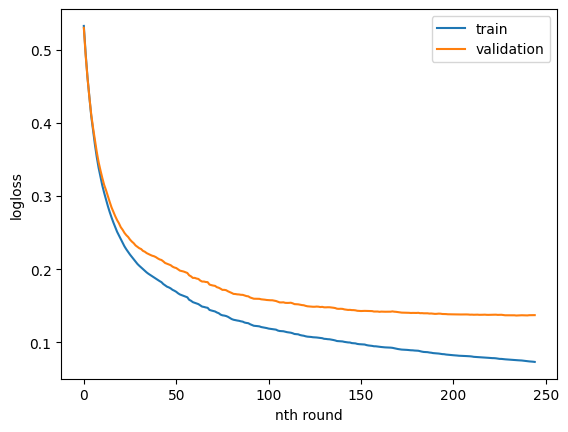

In [86]:
# XGBoost 추가 파라미터 적용 
# 조기종료 적용 -> 과적합 방지, 훈련시간 단축

xgb_clf = XGBClassifier(
    n_estimators = 500, 
    learning_rate = 0.1,
    max_depth=3,
    random_state = 0,
    early_stopping_rounds = 10,     
    eval_metrics = 'logloss'    
)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0)
eval_set = [(X_tr, y_tr), (X_val, y_val)] 
xgb_clf.fit(X_tr, y_tr, eval_set= eval_set, verbose=True)


result = xgb_clf.evals_result()
train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.legend()
plt.xlabel('nth round')
plt.ylabel('logloss')
plt.show()
                

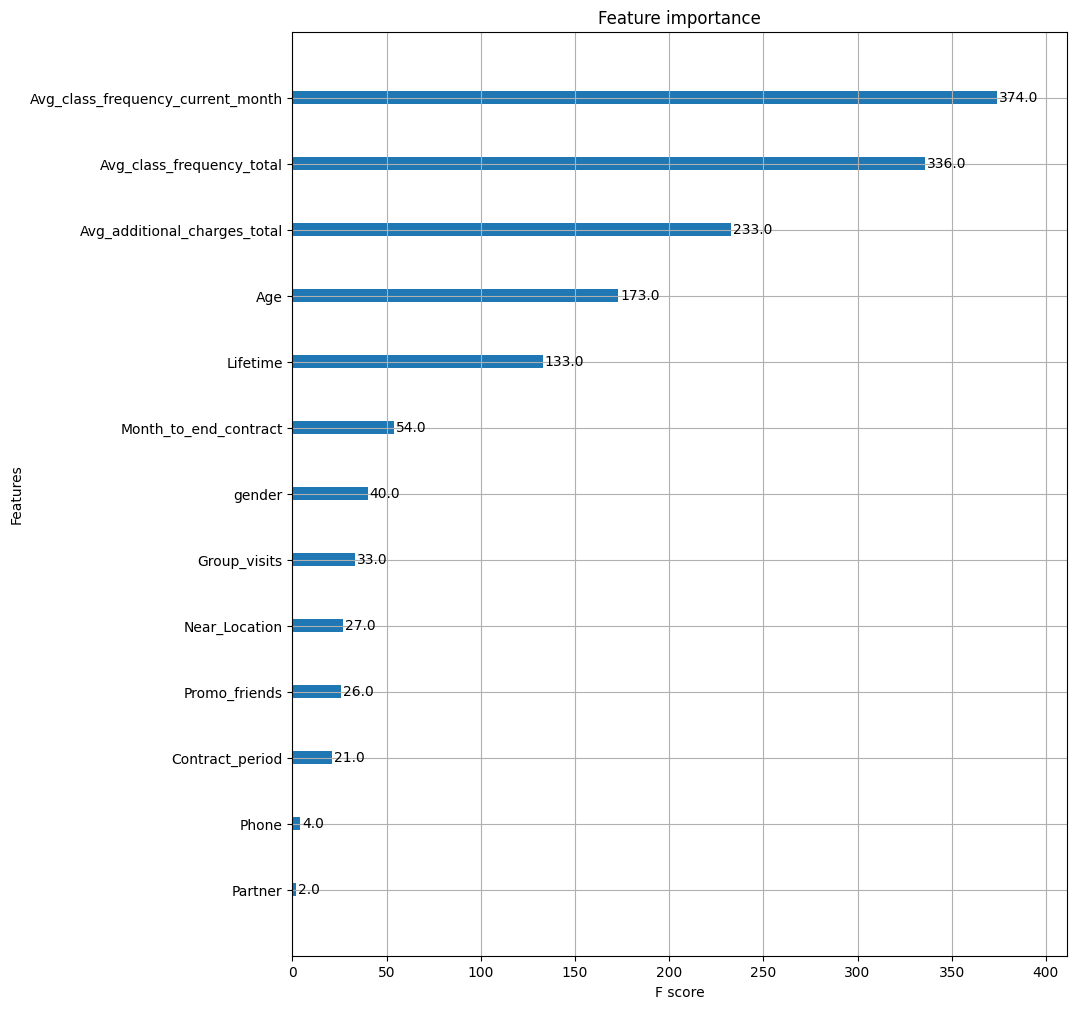

In [87]:
# 특성 중요도 시각화
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_clf, ax =ax) 
plt.show()   

---------------------

### minmax 전처리 사용

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score



In [79]:
# 1. 데이터 로드
df = pd.read_csv('./data/gym_churn_us.csv')

# 2. 전처리
# min_maxscaler
columns = ['Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
encoder = MinMaxScaler()
df[columns] = encoder.fit_transform(df[columns])

# 3. 데이터 분리
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 잘 분리됬는지 확인 
# print(X_train.shape, X_test.shape) # (3200, 13) (800, 13)

# 4. 모델
# 4_1. 로지스틱 모델
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 평가
print(f'훈련 점수: {lr.score(X_train, y_train)}, 테스트 점수: {lr.score(X_test, y_test)}') 

# 모델 성능 평가
y_pred_lr = lr.predict(X_test)
y_pred_lr_proba = lr.predict_proba(X_test)[:, 1]
# Roc_auc 평가 확인
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr_proba))  # 확률값 사용


evaluate_model(y_test, y_pred_lr, 'LogisticRegression')

# 4-2. XGBoost 모델 
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_proba = xgb.predict_proba(X_test)[:, 1]

# 모델 성능 평가
evaluate_model(y_test, y_pred_xgb, 'XGBoost')
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb_proba))  
print(classification_report(y_test, y_pred_xgb))

c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


훈련 점수: 0.9175, 테스트 점수: 0.8975
ROC-AUC Score: 0.9590135434948177

LogisticRegression 모델 성능 평가
accuracy_score 0.8975
precision: 0.8409090909090909
f1_score: 0.783068783068783

XGBoost 모델 성능 평가
accuracy_score 0.9275
precision: 0.8829787234042553
f1_score: 0.8512820512820513
ROC-AUC Score: 0.9695685287592304
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       598
           1       0.88      0.82      0.85       202

    accuracy                           0.93       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.93      0.93      0.93       800



ROC-AUC Score: 0.9590135434948177
ROC-AUC Score: 0.9695685287592304


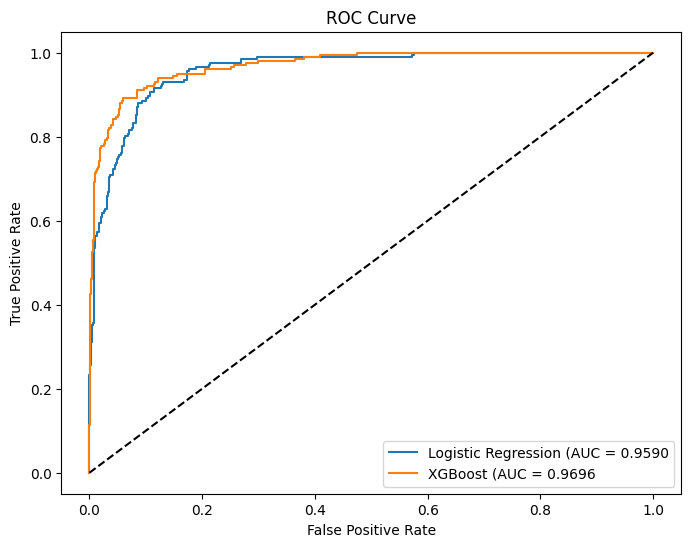

In [64]:
# Roc_auc 평가 확인
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr_proba))  

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb_proba))  

# Roc_curve 시각화
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_proba):.4f}')
    
plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, y_pred_lr_proba, "Logistic Regression")
plot_roc_curve(y_test, y_pred_xgb_proba, "XGBoost")

# 대각선 기준선 (무작위 예측)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

----------------------


## 잘못된 전처리

- one_hot 인코딩 방식은 문자열로 적용되어 있는 컬럼에 적합한 전처리 과정!
- 모두 숫자로 구성되어 있는 현재 데이터에서는 의미있는 전처리 과정이 아님!

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
# 1. 데이터 로드
df = pd.read_csv('./data/gym_churn_us.csv')

# 2. 전처리
# one-hot 인코딩
columns = ['Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
encoder = OneHotEncoder(drop='first', sparse_output=False)

# 해당 에러가 왜 생기는지 궁금...
# df[columns] = encoder.fit_transform(df[columns])
#     # ValueError: Columns must be same length as key
# 이유: 기존 df의 형식 # (4000, 14) 과 endocer을 적용하려는 df[columns]의 shape (4000, 5)가 다르기 때문!

# 해결
encoded_columns = encoder.fit_transform(df[columns])

# 변환된 데이터를 DataFrame으로 변환 후 기존 df와 결합
df_encoded = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns))
df = df.drop(columns=columns).reset_index(drop=True)
df = pd.concat([df, df_encoded], axis=1)
df

# 3. 데이터 분리
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 모델
# 4_1. 로지스틱 모델
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 평가
print(f'훈련 점수: {lr.score(X_train, y_train)}, 테스트 점수: {lr.score(X_test, y_test)}') 

# 모델 성능 평가
y_pred_lr = lr.predict(X_test)


evaluate_model(y_test, y_pred_lr, 'LogisticRegression')

# 4-2. XGBoost 모델 
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# 모델 성능 평가
evaluate_model(y_test, y_pred_xgb, 'XGBoost')


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


훈련 점수: 0.9446875, 테스트 점수: 0.8675

LogisticRegression 모델 성능 평가
accuracy_score 0.8675
precision: 0.7580645161290323
f1_score: 0.7268041237113402


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:16:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost 모델 성능 평가
accuracy_score 0.86875
precision: 0.7487179487179487
f1_score: 0.7355163727959698
